## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    """Code Here
    建立你的神經網路
    """

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.0034 - acc: 0.2867 - val_loss: 1.8838 - val_acc: 0.3285
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8224 - acc: 0.3568 - val_loss: 1.8025 - val_acc: 0.3616
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7482 - acc: 0.3835 - val_loss: 1.8492 - val_acc: 0.3324
Epoch 4/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6964 - acc: 0.4024 - val_loss: 1.7111 - val_acc: 0.3697
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6536 - acc: 0.4208 - val_loss: 1.6968 - val_acc: 0.4028
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6173 - acc: 0.4297 - val_loss: 1.8012 - val_acc: 0.3741
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5862 - acc: 0.4403 - val_loss: 1.6599 - 

Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.0990 - acc: 0.2564 - val_loss: 2.0554 - val_acc: 0.2713
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.0225 - acc: 0.2847 - val_loss: 1.9902 - val_acc: 0.3037
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9680 - acc: 0.3094 - val_loss: 1.9450 - val_acc: 0.3276
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9282 - acc: 0.3263 - val_loss: 1.9118 - val_acc: 0.3311
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8979 - acc: 0.3376 - val_loss: 1.8854 - val_acc: 0.3467
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8735 - acc: 0.3475 - val_loss: 1.8653 - val_acc: 0.3454
Epoch 8/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.8524 - acc: 0.3538 - val_loss: 1.8449 - val_acc: 0.3567
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 121us/step - loss: 2.2383 - acc: 0.1801 - val_loss: 2.2277 - val_acc: 0.1905
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2195 - acc: 0.1936 - val_loss: 2.2105 - val_acc: 0.2037
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2029 - acc: 0.2067 - val_loss: 2.1951 - val_acc: 0.2152
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1878 - acc: 0.2158 - val_loss: 2.1808 - val_acc: 0.2261
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1736 - acc: 0.2250 - val_loss: 2.1671 - val_acc: 0.2327
Epoch 8/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1599 - acc: 0.2322 - val_loss: 2.1538 - val_acc: 0.2426
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.1467 - acc: 0.2388 - val_loss: 2.1412 - val_acc: 0.2470
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 112us/step - loss: 2.3360 - acc: 0.1078 - val_loss: 2.3346 - val_acc: 0.1089
Epoch 5/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.3283 - acc: 0.1093 - val_loss: 2.3276 - val_acc: 0.1114
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3217 - acc: 0.1106 - val_loss: 2.3215 - val_acc: 0.1135
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3160 - acc: 0.1128 - val_loss: 2.3161 - val_acc: 0.1153
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.3110 - acc: 0.1141 - val_loss: 2.3114 - val_acc: 0.1183
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3065 - acc: 0.1155 - val_loss: 2.3072 - val_acc: 0.1202
Epoch 10/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3024 - acc: 0.1177 - val_loss: 2.3034 - val_acc: 0.1230
Epoch 11/50
50000/50000 [===================

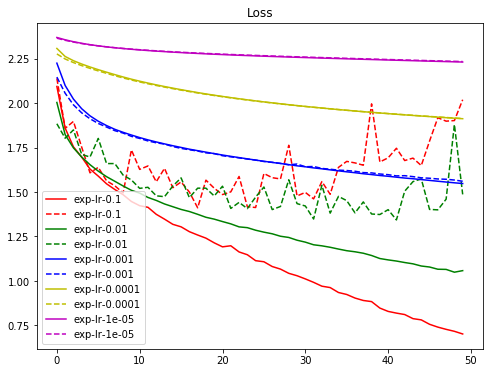

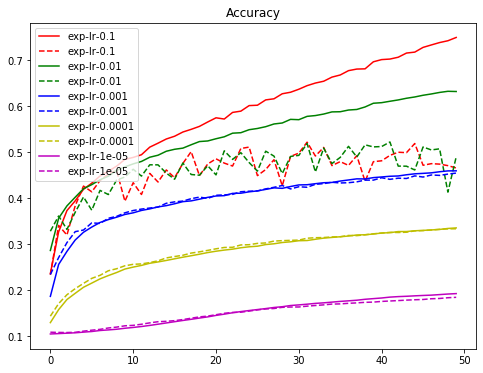

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()